### Задание

Создайте нейронную сеть, распознающую рукописные цифры. Используя подготовленную базу и шаблон ноутбука, нормируйте данные, создайте и обучите сверточную сеть.

**Параметры модели:** сеть должна содержать минимум 2 сверточных слоя; полносвязные слои; слои подвыборки, нормализации, регуляризации по 1 шт.

**Гиперпараметры обучения:** функция ошибки - категориальная кроссэнтропия, оптимизатор - Adam с шагом обучения одна тысячная, размер батча - 128, количество эпох 15, детали обучения - отображать.

**В конце** выведите график обучения: доли верных ответов на обучающей и проверочной выборках.

# Загрузка датасета MNIST
В этом блоке происходит загрузка популярного набора данных MNIST, который содержит изображения рукописных цифр от 0 до 9:

Импортируется модуль mnist из tensorflow.keras.datasets, предназначенный для загрузки набора данных.

Метод .load_data() автоматически скачивает и разделяет данные на две части:

- x_train, y_train — обучающие изображения и соответствующие им метки классов (всего 60 000 примеров).

- x_test, y_test — тестовые изображения и метки классов (всего 10 000 примеров).

In [ ]:
# загрузка датасета MNIST

from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Подключение необходимых библиотек
В этом блоке подключаются все базовые библиотеки и инструменты, необходимые для подготовки и визуализации данных, работы с массивами, случайными значениями и изображениями:

- tensorflow.keras.utils — содержит функцию to_categorical() для преобразования меток классов в формат one-hot encoding.

- numpy — используется для числовых операций и работы с массивами данных.

- matplotlib.pyplot — применяется для построения графиков, например, визуализации изображений и обучения модели.

- random — модуль для генерации случайных чисел, может быть полезен для случайного выбора изображений или настройки случайных параметров.

- PIL.Image — позволяет работать с изображениями, в частности, с их загрузкой и обработкой.

- %matplotlib inline — специальная команда Jupyter Notebook, которая позволяет отображать графики и изображения прямо внутри ячеек ноутбука.

- В блоке можно также добавить настройку подавления ошибок, если требуется исключить предупреждения, чтобы не загромождать вывод.

In [ ]:
# Стандартная библиотека
import random
import warnings

# Сторонние библиотеки
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# TensorFlow / Keras
from tensorflow.keras import utils

# Магическая команда Jupyter
%matplotlib inline  # Вывод изображений в ноутбуке, а не в консоль или файл

# Подавление предупреждений
warnings.filterwarnings("ignore")

# Визуализация примеров изображений из набора MNIST
В этом блоке выполняется визуальный обзор данных, представленных в обучающем наборе MNIST. Это помогает лучше понять структуру и разнообразие входных данных:

- Создается полотно (fig, axs) с 10 ячейками (по количеству классов цифр от 0 до 9) с помощью plt.subplots.

Для каждого класса:

- Определяются индексы всех примеров соответствующего класса в метках y_train с помощью np.where.

- Случайным образом выбирается один из индексов для выбора изображения из x_train.

- Изображение преобразуется в формат, подходящий для отображения, и визуализируется с помощью imshow, используя градации серого (cmap='gray').

Отображение производится с помощью plt.show().

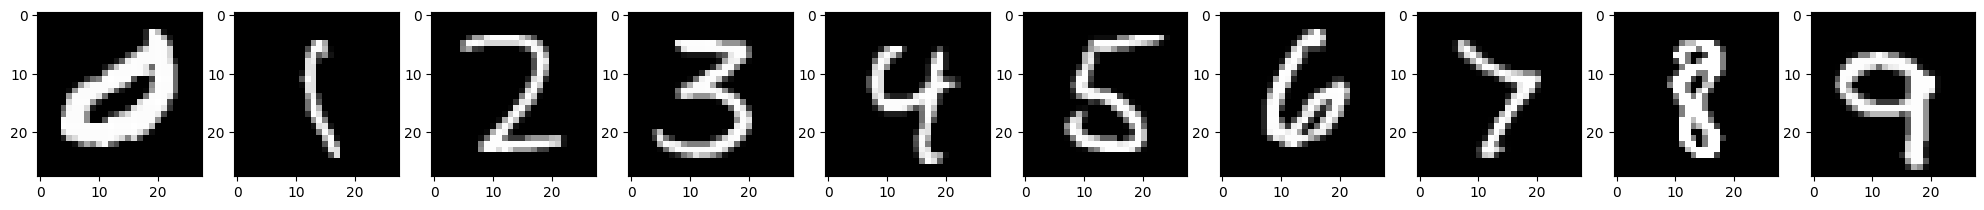

In [ ]:
# вывод изображений каждого класса для ознакомления с датасетом

fig, axs = plt.subplots(1, 10, figsize=(25,3)) # создаем полотно для 10 графиков с размером 25 на 3
for i in range(10):
  label_indexes = np.where(y_train == i)[0] # получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) # выбирает случайный индекс из списка созданного выше
  img = x_train[index] # выбираем из x_train нужное положение
  axs[i].imshow(Image.fromarray(img), cmap='gray') # выводим изображение

plt.show()

# Подготовка данных для сверточной нейронной сети
В этом блоке осуществляется предварительная обработка данных, необходимая для корректной работы сверточной нейронной сети:

- Добавление размерности: MNIST-снимки изначально представлены как двумерные массивы 28×28.
Сверточные слои ожидают вход в виде тензора с тремя пространственными измерениями (высота, ширина, каналы).
Так как изображения черно-белые, добавляется размерность с одним каналом (reshape(..., 1)).

- One-hot encoding (OHE):
Метки классов y_train и y_test переводятся в формат one-hot векторов, содержащих 10 элементов (по количеству цифр от 0 до 9).
Это необходимо, чтобы можно было применять категориальную кроссэнтропию как функцию потерь.

И выполняется проверка размеров: вывод форм и размеров выборок подтверждает корректность преобразований и готовность данных к обучению сверточной модели.

In [ ]:
# добавляем размерность массиву mnist, чтобы сеть поняла что это чб
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

# преобразуем выборки с ответами в OHE
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

# посмотрим форматы выборок перед обучением
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print()
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28, 1)
x_test: (10000, 28, 28, 1)

y_train: (60000, 10)
y_test: (10000, 10)


# Создание и компиляция сверточной нейронной сети
В этом блоке строится и компилируется сверточная нейронная сеть (CNN) для распознавания рукописных цифр из базы MNIST:

- Инициализация модели: cначала создается объект модели Sequential, позволяющий добавлять слои последовательно.

Первый сверточный слой:
- Слой Conv2D с 32 фильтрами размером 3×3 извлекает низкоуровневые признаки из входных изображений.
Указывается форма входа (28, 28, 1) — ч/б изображения размером 28×28 пикселей.
За ним идет слой BatchNormalization, нормализующий активации для ускорения и стабилизации обучения.

Второй сверточный слой:
- Еще один Conv2D с 64 фильтрами. Далее следует MaxPooling2D, уменьшающий размерность признаков, и Dropout(0.25), помогающий бороться с переобучением.

Преобразование признаков:
- Слой Flatten превращает двумерную карту признаков в одномерный вектор для подачи в полносвязные слои.

Полносвязный слой:
- Содержит 128 нейронов и функцию активации ReLU.
Второй Dropout слой (0.5) обеспечивает дополнительную регуляризацию.

Выходной слой:
- Слой Dense(10) с функцией softmax выдает вероятности принадлежности к 10 классам (цифры 0–9).

Затем выполняеся компиляция модели: в качестве функции потерь используется categorical_crossentropy, подходящая для многоклассовой классификации.
Оптимизатор — Adam с шагом обучения 0.001. В качестве метрики — точность (accuracy).

И выполняем вывод структуры:
Метод model.summary() показывает архитектуру модели и количество параметров, обучаемых на каждом слое.

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam


# Создание модели CNN
model = Sequential()

# Первый сверточный слой
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())  # Слой нормализации

# Второй сверточный слой
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))  # Слой подвыборки (пуллинг)
model.add(Dropout(0.25))  # Слой регуляризации

# Преобразование в одномерный вектор для полносвязных слоев
model.add(Flatten())

# Полносвязный слой
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Еще один слой регуляризации

# Выходной слой
model.add(Dense(10, activation='softmax'))

# Компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])
# Вывод структуры модели
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,200,010 (4.58 MB)

 Trainable params: 1,199,946 (4.58 MB)

 Non-trainable params: 64 (256.00 B)

#  Обучение сверточной нейронной сети
В этом блоке производится обучение модели на данных MNIST:

Метод обучения: используется model.fit, который запускает процесс обучения на заданное число эпох.

Параметры:

- x_train, y_train: обучающая выборка — изображения и метки (в OHE-формате).

- batch_size=128: обучающие данные обрабатываются пакетами по 128 примеров, что позволяет эффективно использовать память и ускорить обучение.

- epochs=15: модель проходит через всю обучающую выборку 15 раз.

- verbose=1: отображается прогресс обучения в виде строки на каждую эпоху.

- validation_data=(x_test, y_test): указаны данные для проверки точности модели после каждой эпохи.

In [ ]:
# Обучение модели
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=15,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 154s 321ms/step - accuracy: 0.7643 - loss: 0.7590 - val_accuracy: 0.9820 - val_loss: 0.0607
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 199s 316ms/step - accuracy: 0.9419 - loss: 0.1868 - val_accuracy: 0.9870 - val_loss: 0.0437
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 202s 315ms/step - accuracy: 0.9541 - loss: 0.1400 - val_accuracy: 0.9871 - val_loss: 0.0399
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 204s 320ms/step - accuracy: 0.9619 - loss: 0.1174 - val_accuracy: 0.9880 - val_loss: 0.0380
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 148s 316ms/step - accuracy: 0.9652 - loss: 0.1028 - val_accuracy: 0.9885 - val_loss: 0.0379
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 209s 330ms/step - accuracy: 0.9703 - loss: 0.0887 - val_accuracy: 0.9908 - val_loss: 0.0336
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 204s 334ms/step - accuracy: 0.9719 - loss: 0.0826 - val_accuracy: 0.9910 - val_loss: 0.0318
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 150s 321ms/step - accuracy: 0.9753 -

# Оценка модели на тестовой выборке
В этом блоке проводится проверка качества обученной нейронной сети на тестовых данных:

- Используется метод model.evaluate, который вычисляет функцию потерь и метрики (в данном случае точность) по тестовому набору.

- Параметр verbose=0 отключает вывод подробностей процесса оценки.

В результате выводятся два значения:

- Test loss — величина ошибки модели на тестовых данных.

- Test accuracy — точность модели, выраженная в долях от 1.

In [ ]:
# Оценка точности на тестовых данных
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.037876155227422714
Test accuracy: 0.9909999966621399


# Визуализация процесса обучения модели
В данном блоке создаются графики, которые наглядно показывают динамику качества обучения нейронной сети.

Первый график отображает изменение точности модели:

- На оси X откладывается номер эпохи.

- На оси Y — значение точности.

- Отдельные линии показывают точность на обучающей (Train Accuracy) и валидационной (Validation Accuracy) выборках.

Второй график показывает изменение функции потерь (ошибки) в процессе обучения:

- Аналогично, по оси X — эпохи, по оси Y — значение потерь.

- Отдельные линии для обучающей и валидационной выборок.


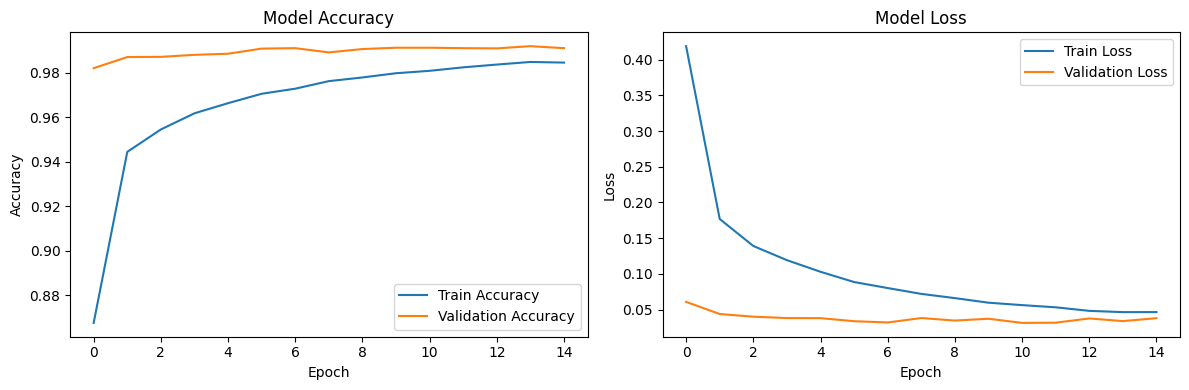

In [ ]:
# Построение графиков обучения
plt.figure(figsize=(12, 4))

# График точности
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# График потерь
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Вывод по зданию
Выполненная сверточная нейронная сеть продемонстрировала высокую эффективность в задаче распознавания рукописных цифр. Тестовая точность составила около 99.1%, что свидетельствует о способности модели правильно классифицировать изображения с минимальным числом ошибок. При этом значение функции потерь на тестовых данных было низким (примерно 0.038), что подтверждает хорошее обобщение модели и отсутствие переобучения.

Достигнутые результаты говорят о том, что выбранная архитектура — с двумя сверточными слоями, слоями нормализации, подвыборки и регуляризации, а также полносвязными слоями — является оптимальной для решения данной задачи при заданных гиперпараметрах.